# **Data Science Experience**
*Prof. Orlando Junior*

---

**Conteúdo**

1. O que é Pandas?
2. Séries
3. Visualização de séries
4. Séries temporais
5. *DataFrames*
6. Indexação de *DataFrames*
7. Exercícios

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## O que é Pandas?

> **Pandas** (*Panel Data*, dados em painel) é uma biblioteca *open-source* que fornece alto desempenho e facilidade de uso para estruturas de dados e ferramentas de análise de dados.

**Pontos-chave:**
* Objeto DataFrame rápido e eficiente com valores default;
* Ferramentas para carregamento de dados em memória a partir de diferentes formatos;
* Tratamento de dados faltantes (missing);
* Fatiamento e reformatação de grandes conjuntos de dados;
* Colunas podem ser deletadas ou inseridas;
* Agrupamento de dados usando agregação e transformações;
* Alto desempenho em união e junção de dados;
* Habilitado para séries temporais.

## Séries

***Series*** é uma estrutura de dados do tipo arranjo unidimensional e rotulada capaz de guardar dados de qualquer tipo de dado. Os eixos dos rótulos são chamados de `índices`.

In [3]:
serie = pd.Series([10, 20, 77, 6, -150, 70, 86, 93, 123])
serie.name = 'Série'

In [4]:
print(serie)

0     10
1     20
2     77
3      6
4   -150
5     70
6     86
7     93
8    123
Name: Série, dtype: int64


In [5]:
# Mostra os 3 primeiros elementos
serie.head(3)

0    10
1    20
2    77
Name: Série, dtype: int64

In [6]:
# Mostra os últimos elementos
serie.tail(1)

8    123
Name: Série, dtype: int64


## Visualização de séries

In [ ]:
# Define a semente para a geração de números pseudoaleatórios
# para todo o notebook
np.random.seed(42)

# 100 números aleatórios entre 10 e 100
a = np.random.randint(low = 10, high = 100, size = 100)
serie = pd.Series(a)

In [ ]:
serie

In [ ]:
# Plota como um gráfico de linhas
serie.plot()

In [ ]:
# Plota como um histograma
serie.plot(kind = 'hist')

In [ ]:
# Outra forma de plotar como histograma
serie.plot.hist()

In [ ]:
# Plota como uma curva de densidade
serie.plot.kde()

In [ ]:
# Plota como boxplot
serie.plot.box()

## Séries temporais

In [ ]:
# Constrói uma frequência de datas para dias de negócio ('B')
datas = pd.date_range(start = '2021-1-1', periods = 50, freq = 'B')
print(datas)

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-18',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
               '2021-02-26', '2021-03-01', '2021-03-02', '2021-03-03',
               '2021-03-04', '2021-03-05', '2021-03-08', '2021-03-09',
               '2021-03-10', '2021-03-11'],
              dtype='datetime64[ns]', freq='B')


In [ ]:
# np.random.normal
# loc = média (10)
# scale = desvio padrão (0.5 - 3 - 0.01)
# size = quantidade (50)

In [ ]:
# Constrói 3 séries temporais aleatórias
#pd.Series(data=, index=datas)

ts1  = pd.Series(data = np.random.normal(loc = 10, scale = 0.5, size = 50), index = datas)
ts2 = pd.Series(data = np.random.normal(loc = 10, scale = 3, size = 50), index = datas)
ts3 = pd.Series(data = np.random.normal(loc = 10, scale = 0.01, size = 50), index = datas)

In [ ]:
print(ts1)

In [ ]:
# Plota apenas 1 série temporal
plt.figure(figsize = (10, 3))                                 # Contêiner para todos os elementos de plotagem
                                                              # figsize = (width, height) # Dimensão da figura
plt.plot(ts1, color = 'red', marker = 'o', markersize = 5)   # Função para plotar
                                                              # Marcadores: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
plt.title('Série Temporal', fontsize = 15, pad = 15)          # Título do gráfico
plt.ylabel('Quantidade de Vendas')                            # Rótulo do eixo Y
plt.xlabel('Tempo')                                           # Rótulo do eixo X
plt.grid()                                                    # Insere grades no gráfico
plt.savefig('fig1.pdf')                                       # Salve a imagem no disco
plt.show()                                                    # Mostra o gráfico

In [ ]:
# Plota todas as séries temporais
plt.figure(figsize = (10, 4))
plt.plot(ts1, marker = 'o', ms = 3, color = 'black')
plt.plot(ts2, marker = 'v', ms = 5, color = 'red')
plt.plot(ts3, color = 'gray')
plt.title('Séries Temporais', fontsize = 15, pad = 15)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid(linestyle = '--', alpha = 0.8)
plt.show()

## *DataFrames*

Um ***DataFrame*** é uma estrutura de dados bidimensional que apresenta os dados armazenados de modo tabular, usando linhas e colunas.

In [7]:
carros = {
    "carro":["City","Ignis","800","Verna","Venue","Punto"],
    "marca":["Honda","Maruti","Maruti","Hyundia","Hyundai","Fiat"],
    "preco":[900000,600000,100000,800000,950000,750000],
    "ano":[2005,2007,2010,2004,2002,2006]
}
print(carros)

{'carro': ['City', 'Ignis', '800', 'Verna', 'Venue', 'Punto'], 'marca': ['Honda', 'Maruti', 'Maruti', 'Hyundia', 'Hyundai', 'Fiat'], 'preco': [900000, 600000, 100000, 800000, 950000, 750000], 'ano': [2005, 2007, 2010, 2004, 2002, 2006]}


In [8]:
auto = pd.DataFrame(carros)
print(auto)

   carro    marca   preco   ano
0   City    Honda  900000  2005
1  Ignis   Maruti  600000  2007
2    800   Maruti  100000  2010
3  Verna  Hyundia  800000  2004
4  Venue  Hyundai  950000  2002
5  Punto     Fiat  750000  2006


In [ ]:
auto

In [ ]:
auto.head(3)

In [ ]:
# Salva arquivo como CSV
auto.to_csv('auto.csv', index=False)

In [ ]:
# Import arquivo
novo_auto = pd.read_csv("auto.csv")

In [ ]:
# Informações do conjunto de dados
novo_auto.info()

In [ ]:
# Formato
print(novo_auto.shape)

# Colunas
print(novo_auto.columns)

In [ ]:
# Estatísticas
print("Soma Total   :", novo_auto.preco.sum())
print("Preço médio  :", novo_auto['preco'].mean())

In [ ]:
# Sumarização dos dados
novo_auto.describe()

In [ ]:
novo_auto_desc = novo_auto.describe().T

In [ ]:
novo_auto_desc[['mean', 'std']]

## Indexação de *DataFrames*

In [9]:
# Acessando a coluna pelo rótulo
print(novo_auto["carro"])

NameError: name 'novo_auto' is not defined

In [ ]:
# Acessando a coluna pelo índice
# linha, coluna
# :
# 0
print(novo_auto.iloc[:, 0])

In [ ]:
# Acessando as linhas pelo índice da linha
print(novo_auto.iloc[0])

In [ ]:
# Acessando as linhas pelo nome da coluna
print(novo_auto.loc[:,'preco'])

In [ ]:
# Acessando as linhas com várias colunas
novo_auto.loc[:,['carro', 'preco', 'marca']]

In [ ]:
# Acessando linhas específicas
novo_auto.loc[1:3, ['marca', 'carro']]

In [ ]:
# Gera 15 valores de 1 até 20
np.linspace(1, 20, num=15, dtype=np.int64).reshape(5, 3)

In [ ]:
d = np.linspace(1, 20, num=15, dtype=np.int64)
m = np.array(d).reshape(5, 3)
df = pd.DataFrame(m,
                  index = ['a','b','c','d','e'],
                  columns = ['A', 'B', 'C'])
df

In [ ]:
# Acessando pelos índices como rótulos
df.loc['b':'d']

In [ ]:
df

In [ ]:
# Criando filtros para linhas e colunas
# SELECT B,C FROM df WHERE A > 5
df.loc[df['A'] >= 5, ['B', 'C']]

In [ ]:
# Alterando valores pelos filtros
df.loc[df['A'] > 5, ['B', 'C']] = 100
df

In [ ]:
# Duplo filtro nas linhas pelas colunas
df.loc[(df['A'] >= 5) & (df['B'] < 100), ['B', 'C']]

In [ ]:
df.query("B == 100")['B']

## Exercícios

**1 #** Crie uma série temporal aleatória com 10 finais de semana iniciando em '2000-01-01'.

In [ ]:
np.random.seed(42)

2000-01-01    10.248357
2000-01-02     9.930868
2000-01-08    10.323844
2000-01-09    10.761515
2000-01-15     9.882923
2000-01-16     9.882932
2000-01-22    10.789606
2000-01-23    10.383717
2000-01-29     9.765263
2000-01-30    10.271280
dtype: float64

**2 #** Plote a série temporal anterior apresentando-a em uma linha verde, com marcadores, título, eixos X e Y com rótulos e valores, sem grades.

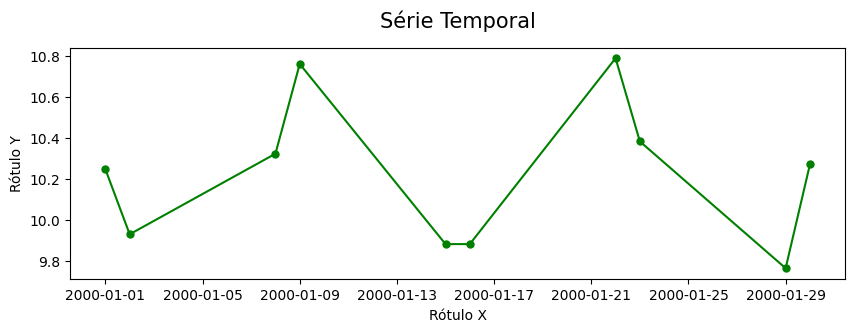

**Execute a instrução a seguir.**

In [ ]:
data = pd.DataFrame({
    'idade'  : [ 10, 22, 13, 21, 32, 11, 17],
    'secao'  : [ 'A', 'B', 'C', 'B', 'B', 'A', 'A'],
    'cidade' : [ 'São Paulo', 'Rio de Janeiro', 'Santo André', 'Rio de Janeiro', 'Osasco', 'Rio de Janeiro', 'Osasco'],
    'sexo'   : [ 'M', 'F', 'F', 'M', 'M', 'M', 'F'],
    'cor'    : [ 'vermelho', np.NAN, 'amarelo', np.NAN, 'preto', 'verde', 'vermelho']
})

In [ ]:
data

,idade,secao,cidade,sexo,cor
0,10,A,São Paulo,M,vermelho
1,22,B,Rio de Janeiro,F,NaN
2,13,C,Santo André,F,amarelo
3,21,B,Rio de Janeiro,M,NaN
4,32,B,Osasco,M,preto
5,11,A,Rio de Janeiro,M,verde
6,17,A,Osasco,F,vermelho


**3 #** Selecione todas as pessoas maiores de 15 anos.

**4 #** Selecione todas as pessoas residentes em Santo André.

**5 #** Selecione todas as pessoas que não possuem uma cor favorita.

**6 #** Selecione a terceira e a quarta linhas.

**7 #** Selecione as três primeiras linhas e apresente as colunas idade e sexo.

**8 #** Selecione todas as pessoas da seção B com menos de 30 anos.